In [1]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import numpy as np

In [2]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from SMART_annotation import annotate_motifs

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\sparsestack\StackedSparseArray.py:4: DeprecationWarning: Please use `get_index_dtype` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import get_index_dtype


In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"

In [4]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=66)

In [5]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
60    -0.176555  0.175575       1        1  2.835586
22    -0.208501 -0.027982       2        1  2.677884
58    -0.012671 -0.185443       3        1  2.675950
21    -0.205515 -0.090010       4        1  2.586702
47     0.012252 -0.150408       5        1  2.347076
...         ...       ...     ...      ...       ...
10    -0.075187  0.029768      62        1  0.728837
30     0.077583  0.020051      63        1  0.667726
20    -0.047455 -0.151993      64        1  0.648149
49    -0.133023 -0.124668      65        1  0.616608
2      0.036840  0.005401      66        1  0.580977

[66 rows x 5 columns], topic_info=         Term         Freq        Total Category  logprob  loglift
3944   70.04+  3341.000000  3341.000000  Default  30.0000  30.0000
141   127.02+  1900.000000  1900.000000  Default  29.0000  29.0000
61     72.04+  2751.000000  2751.000000  Default  28.0000  28.0000
2599  158.98+  1972.000000  1972.000000  Default  27.0000  27.0000
513   125.02+  1848.000000  1848.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
2924     48.0    12.235777   146.196161  Topic66  -5.0570   2.6676
2307   293.13    11.755444   154.937907  Topic66  -5.0971   2.5695
6688   257.13     8.508130    58.621260  Topic66  -5.4203   3.2181
5451   227.08    10.075093   158.173483  Topic66  -5.2513   2.3946
2469   216.1+    10.969601   350.404984  Topic66  -5.1662   1.6843

[3685 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4318      2  0.064381    0.03
4318      3  0.879880    0.03
4318      5  0.010730    0.03
4318     16  0.010730    0.03
4318     27  0.010730    0.03
...     ...       ...     ...
1672     57  0.014261  99.09+
1230     13  0.117533   99.13
1230     41  0.117533   99.13
1230     49  0.117533   99.13
1230     60  0.470131   99.13

[14182 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[61, 23, 59, 22, 48, 41, 45, 42, 56, 32, 8, 9, 1, 47, 2, 58, 51, 6, 38, 36, 65, 25, 63, 27, 24, 15, 62, 13, 60, 17, 34, 10, 37, 52, 46, 4, 28, 26, 19, 44, 12, 16, 54, 43, 40, 30, 55, 7, 53, 49, 18, 20, 14, 35, 39, 66, 57, 64, 29, 33, 5, 11, 31, 21, 50, 3])

In [6]:
smiles_per_motifs, predicted_motifs, predicted_motifs_distribution = predict_with_lda(lda_model, spectra_path, id2word)

---

### Annotation

In [7]:
annotated_motifs = []
for smiles_per_motif in smiles_per_motifs:
    annotated_motif = annotate_motifs(smiles_per_motif)
    annotated_motifs.append(annotated_motif)

In [8]:
for motif_number, annotated_motif in enumerate(annotated_motifs):
    print(motif_number, len(smiles_per_motifs[motif_number]),len(annotated_motifs[motif_number]), np.sum(annotated_motif))

0 6 166 17.0
1 10 166 20.0
2 5 166 16.0
3 7 166 15.0
4 9 166 8.0
5 14 166 23.0
6 8 166 14.0
7 17 166 7.0
8 10 166 12.0
9 8 166 10.0
10 5 166 14.0
11 7 166 17.0
12 9 166 7.0
13 9 166 7.0
14 7 166 13.0
15 8 166 7.0
16 14 166 8.0
17 8 166 8.0
18 12 166 8.0
19 9 166 11.0
20 6 166 16.0
21 12 166 13.0
22 5 166 29.0
23 12 166 7.0
24 11 166 11.0
25 12 166 4.0
26 13 166 8.0
27 12 166 10.0
28 7 166 10.0
29 10 166 13.0
30 7 166 11.0
31 10 166 17.0
32 5 166 18.0
33 13 166 14.0
34 6 166 18.0
35 13 166 8.0
36 9 166 12.0
37 14 166 17.0
38 8 166 10.0
39 11 166 14.0
40 13 166 6.0
41 9 166 8.0
42 6 166 9.0
43 8 166 15.0
44 13 166 8.0
45 13 166 6.0
46 11 166 4.0
47 14 166 11.0
48 8 166 11.0
49 6 166 21.0
50 11 166 16.0
51 8 166 9.0
52 7 166 12.0
53 12 166 8.0
54 11 166 15.0
55 14 166 10.0
56 7 166 12.0
57 14 166 3.0
58 17 166 25.0
59 8 166 7.0
60 11 166 11.0
61 17 166 7.0
62 12 166 7.0
63 7 166 8.0
64 8 166 4.0
65 5 166 15.0


In [9]:
from rdkit.Chem import Draw
from rdkit import Chem

### Known Dataset

In [18]:
motif_number = 18

In [19]:
len(annotated_motifs[motif_number])

166

In [20]:
annotated_motifs[motif_number]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.])

In [21]:
len(smiles_per_motifs[motif_number])

12

In [22]:
smiles_per_motifs[motif_number]

['C1=CC=C(C=C1)NC(=O)NC2=CN=NS2',
 'CN1COCN(C1=N[N+](=O)[O-])CC2=CN=C(S2)Cl',
 'CC1=C(C(=CC=C1)C)N(C(C)C(=O)OC)C(=O)COC',
 'CCC1CCCC(C(C(=O)C2=CC3C(C2CC(=O)O1)CCC4C3CC(C4)OC5C(C(C(C(O5)C)OC)OCC)OC)C)OC6CCC(C(O6)C)N(C)C',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CC1=C(C(=CC=C1)C)N(C(C)C(=O)OC)C(=O)COC',
 'COC1=C(C=C(C=C1)C(=CC(=O)N2CCOCC2)C3=CC=C(C=C3)Cl)OC',
 'CC1=C2C(=CC=C1)SC3=NN=CN23',
 'CC1=NC(=NC(=C1)C2CC2)NC3=CC=CC=C3',
 'CCC(C)C1C(CCC2(O1)CC3CC(O2)CC=C(C(C(C=CC=C4COC5C4(C(C=C(C5O)C)C(=O)O3)O)C)OC6CC(C(C(O6)C)OC7CC(C(C(O7)C)O)OC)OC)C)C',
 'C1=CC=C2C(=C1)NC(=N2)C3=CC=CO3',
 'CC(C)C1CCC(C1(CN2C=NC=N2)O)CC3=CC=C(C=C3)Cl']

In [23]:
predicted_motifs_distribution[motif_number]

[[(18, 0.6365685), (52, 0.36012182)],
 [(18, 0.9984917)],
 [(18, 0.9972943)],
 [(18, 0.99730134)],
 [(18, 0.9987703)],
 [(18, 0.9972943)],
 [(18, 0.99281013)],
 [(18, 0.7340755), (31, 0.25874138)],
 [(18, 0.7934818), (56, 0.20277402)],
 [(18, 0.9980492)],
 [(18, 0.9973451)],
 [(18, 0.99734485)]]

In [24]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

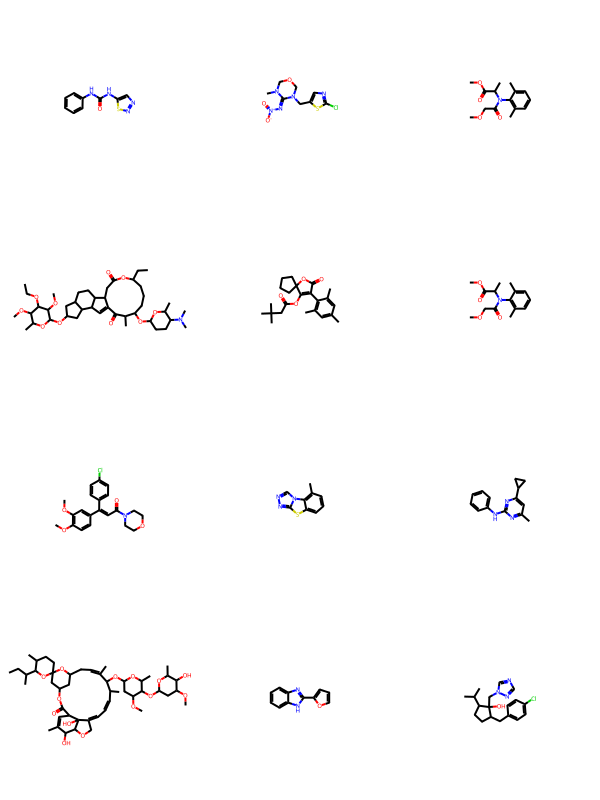

In [25]:
Draw.MolsToGridImage(mol_per_motif)

### to compare clusters you could use the tanimoto similarity for a binary motif fingerprint (not implemented yet) against another binary motif fingerprint

---

### Unknown Dataset

In [24]:
#spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"

In [25]:
smiles_per_motifs_diffDB, predicted_motifs_diffDB = predict_with_lda(lda_model, spectra_path_diffDB, id2word)

In [26]:
annotated_motifs_diffDB = []
purities_maccs_diffDB = []
for smiles_per_motif in smiles_per_motifs_diffDB:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs_diffDB.append(annotated_motif)
    purities_maccs_diffDB.append(purity_maccs)

The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


In [27]:
for motif_number, purity_maccs in enumerate(purities_maccs_diffDB):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))

0 0 0 nan
1 0 0 nan
2 0 0 nan
3 0 0 nan
4 0 0 nan
5 0 0 nan
6 0 0 nan
7 0 0 nan
8 0 0 nan
9 0 0 nan
10 1 79 1.0
11 0 0 nan
12 0 0 nan
13 0 0 nan
14 0 0 nan
15 0 0 nan
16 0 0 nan
17 1 80 1.0
18 0 0 nan
19 0 0 nan
20 0 0 nan
21 0 0 nan
22 0 0 nan
23 1 36 1.0
24 0 0 nan
25 0 0 nan
26 2 2 0.5098039215686274
27 0 0 nan
28 0 0 nan
29 2 18 0.5833333333333334
30 0 0 nan
31 4 6 0.3477272727272727
32 1 37 1.0
33 6 9 0.24681238615664844
34 1 45 1.0
35 1 29 1.0
36 2 15 0.5862068965517241
37 0 0 nan
38 2 6 0.531578947368421
39 2 7 0.5546875
40 3 8 0.42611683848797244
41 5 2 0.2768211920529801
42 0 0 nan
43 3 14 0.4809523809523809
44 3 6 0.4479166666666667
45 3 17 0.5333333333333332
46 4 6 0.3475609756097561
47 5 10 0.3441176470588235
48 3 7 0.42028985507246375
49 1 56 1.0
50 4 4 0.3489010989010989
51 4 2 0.30743243243243246
52 1 60 1.0
53 6 4 0.3034188034188034
54 9 2 0.17965367965367968
55 13 3 0.17066534751422213
56 10 2 0.16044776119402984
57 12 5 0.18011603375527427
58 22 5 0.13261183261183263


C:\Users\dietr004\AppData\Local\Temp\ipykernel_31628\3576634217.py:4: RuntimeWarning: Mean of empty slice
  print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))


In [28]:
motif_number = 22

In [29]:
len(annotated_motifs_diffDB[motif_number])

0

In [30]:
annotated_motifs_diffDB[motif_number]

[]

In [31]:
smiles_per_motifs_diffDB[motif_number]

[]

In [32]:
mol_per_motif_diffDB = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs_diffDB[motif_number]]

In [33]:
Draw.MolsToGridImage(mol_per_motif_diffDB)

[11:56:53] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78


----

In [64]:
smarts_mol = [Chem.MolFromSmarts(smarts) for smarts in annotated_motifs_diffDB[motif_number]]

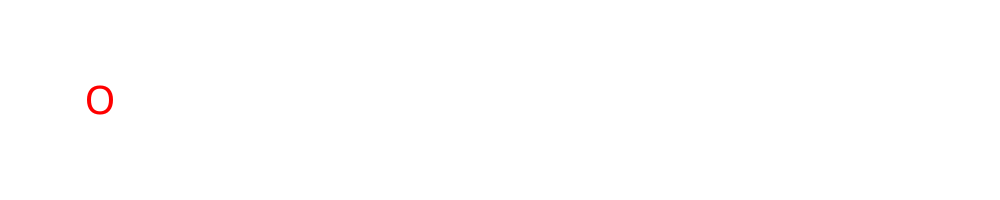

In [67]:
Draw.MolsToGridImage(smarts_mol[:5], molsPerRow=5)

In [29]:
Draw.MolsToGridImage(smarts_mol[9:], molsPerRow=5)

[14:52:27] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78
